In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Week 9 Lecture 1: Higher Order ODEs and Dynamical Systems
## Rahman notes:

Let's do the examples we did in the theory lecture.

Consider the simple pendulum, which we showed in the theory lecture is modeled as
$$
\frac{d\theta}{dt} = \omega\\
\frac{d\omega}{dt} = -\sin\theta
$$
If we were to use forward Euler we would get the following scheme:

In [ ]:
omega = 0
theta = 1
dt = 0.1

for i in range(100):
  theta = theta + dt*omega
  omega = omega + dt*(-np.sin(theta))

print(theta)

-0.997033921796586


Now let's try it with integrate.

In [ ]:
omega = 0
theta = 1
dt = 0.01
t = np.arange(0, 10 + dt, dt)

def SimplePendulum(t,y):
  dy1 = y[1]
  dy2 = -np.sin(y[0])

  dy = np.array([dy1, dy2])
  return dy

sol = scipy.integrate.solve_ivp(SimplePendulum, (0, 10), np.array([theta, omega]), t_eval=t)
x = sol.y[0, -1]
print(x)

-0.9961684063893261


We can use this to plot our phase plane

(-9.42477796076938, 9.42477796076938, -3.0, 3.0)

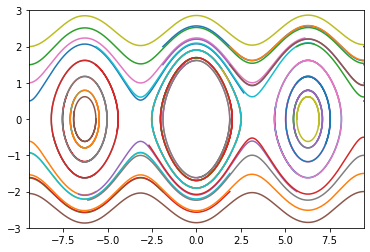

In [ ]:
omega = np.arange(-2, 2+0.5, 0.5)
theta = np.arange(-3*np.pi, 3*np.pi + 6*np.pi/5, 6*np.pi/5)
dt = 0.01
t = np.arange(0, 10 + dt, dt)

for i in range(np.size(omega)):
  for j in range(np.size(theta)):
    sol = scipy.integrate.solve_ivp(SimplePendulum, (0, 10), np.array([theta[j], omega[i]]), t_eval=t)
    plt.plot(sol.y[0,:], sol.y[1,:])

plt.axis([-3*np.pi, 3*np.pi, -3, 3])

We can even simulate it as a video.  Try it for different initial points

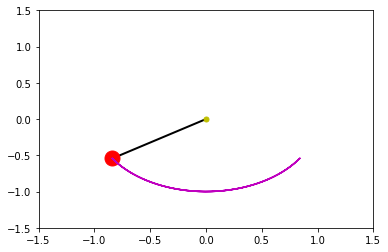

<function matplotlib.pyplot.cla>

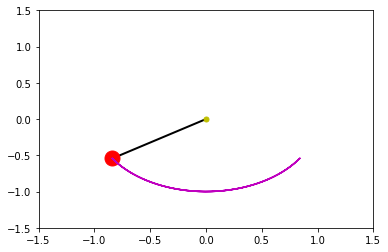

In [ ]:
import time
from IPython import display

omega = 0
theta = 1
dt = 0.01
t = np.arange(0, 10 + dt, dt)

def SimplePendulum(t,y):
  dy1 = y[1]
  dy2 = -np.sin(y[0])

  dy = np.array([dy1, dy2])
  return dy

sol = scipy.integrate.solve_ivp(SimplePendulum, (0, 10), np.array([theta, omega]), t_eval=t)

y = -np.cos(sol.y[0,:])
x = np.sin(sol.y[0,:])

for i in range(np.size(t)):
  plt.cla()
  plt.plot(np.array([0, x[i]]), np.array([0, y[i]]), 'k', linewidth = 2)
  plt.plot(x[i], y[i], 'r.', markersize = 30)
  plt.plot(0, 0, 'y.', markersize = 10)
  plt.plot(x[1:i], y[1:i],'m')
  plt.axis([-1.5, 1.5, -1.5, 1.5])
  display.clear_output(wait=True)
  display.display(plt.gcf())

plt.cla